<a href="https://colab.research.google.com/github/Taeseong-eom/ApplePython/blob/main/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[73.24484048 -8.42672128 -7.00774851]


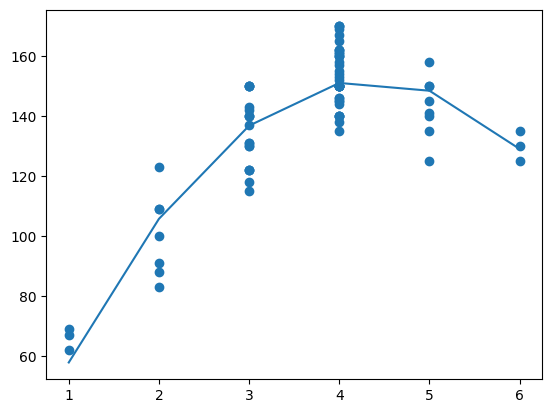

In [11]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/income.txt')
df = df.dropna() # 빈 값 제거.

#plt.scatter(df['age'],df['income'])
#plt.show()

# 직선으로 예측할 수 없으니 곡선으로 예측해보자
# Y = ax + bx^2 + c
def 함수(x, a, b, c):
  return a*x + b*x**2 + c
opt, cov = curve_fit(함수, df['age'],df['income'])# 함수,x,y를 넣고// 곡선 추정할때 사용함
# opt에 a,b,c 값을 넣고 cov에는 공분산을 넣음.
print(opt)
a,b,c = opt

plt.scatter(df['age'],df['income'])
x = np.array([1,2,3,4,5,6]) # 리스트를 numpy array로 바꿈 // 행렬 쓸때 리스트보다 array가 편함.
plt.plot(x,함수(x,a,b,c))

In [18]:
import statsmodels.api as sm

# y = ax + bx^2 + c 니까
# x = np.column_stack([df['age'],df['age']**2, np.ones(79) ]) # np.column_stack 쓰면 각각 리스트로 스택을 만들어줌.
# const(상수)가 P>|t| : 0.445 이라서 삭제했음 R-squared (uncentered): 0.793 -> 0.994 으로 유의미한 확률 증가를 보임.
x = np.column_stack([df['age'],df['age']**2])
model = sm.OLS(df['income'],x).fit()
print(model.summary())

# 데이터 정확성을 높이기 위해 차원을 높이면 정확도가 올라갈까?
# 그럼 overfitting 현상이 생길 수 있다.
# 주어진 데이터에만 적합한 모델이 되어 예측이 안된다.
# 그래서 경험적으로 커브 수를 조절해야한다.

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              6671.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                    5.15e-87
Time:                        11:30:53   Log-Likelihood:                         -299.21
No. Observations:                  79   AIC:                                      602.4
Df Residuals:                      77   BIC:                                      607.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------